In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.7.0


# OCR notebook

### Getting the data

We can find a lot of datasets that we can import from keras/tensorflow, mnist is one of them.
You can see others here: https://keras.io/api/datasets/

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Question#1 : why did we split the data into train and test



Show some pictures of the test data

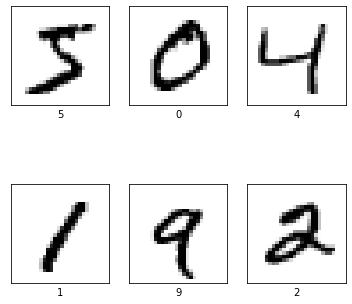

In [5]:
plt.figure(figsize=(6,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Normalizing for better acc

In [6]:
x_train = x_train / 255.0
y_train = y_train / 255.0

x_test = x_test / 255.0
y_test = y_test / 255.0

# Q2: why do we normalize? (for the next session)

Looking at the shape

In [7]:
x_train.shape

(60000, 28, 28)

Creating the model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# Q3: What is flatten?
# Q4: What does this network learn?
# Q5: What are the activations?


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Q6: What are optimizers and loss?
# Q7: How is the accuracy calculated?

Training the model

In [11]:
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 15s 6ms/step - loss: 0.0054 - accuracy: 0.0987
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1978e-07 - accuracy: 0.0987
Epoch 3/3
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3969e-08 - accuracy: 0.0987


Evaluating the model on test data

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 3.7108e-08 - accuracy: 0.0980


[3.7108293327037245e-08, 0.09799999743700027]

[0]


<function matplotlib.pyplot.show(close=None, block=None)>

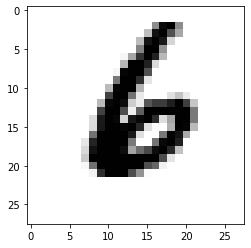

In [13]:
from random import randrange

currImage = randrange(x_test.shape[0])

pred = model.predict(x_test[currImage].reshape(1, 28, 28))
print(np.argmax(pred, axis = 1))

plt.imshow(x_test[currImage], cmap=plt.cm.binary)
plt.show